In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

data = pd.read_csv('Fortnite_players_stats.csv')
## look at the data
data.head()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0


In [22]:
from sklearn import linear_model
## based on solo win ratio predict duo win ratio
scoreMatchesX = data[['Solo winRatio']]
killsyY = data['Duos winRatio']

regr = linear_model.LinearRegression()
regr.fit(scoreMatchesX, killsyY)
# The model's regression coefficients
print(regr.coef_)

[0.83461503]


In [20]:
predicted = regr.predict([[20]])
print(predicted)

[23.82635807]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


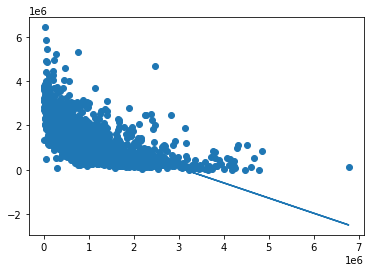

In [10]:
# Scipy’s Linear Regression
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Fortnite_players_stats.csv')
xi = data['Solo score']
yi = data['Duos score']
slope, intercept, r, p, std_err = stats.linregress(xi, yi)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, xi))
plt.scatter(xi, yi)
plt.plot(xi, mymodel)
plt.show()

In [23]:
## based on number of Solo matches predict Solo winRatio
# The more you play, more often you gonna win?
scoreMatchesX = data[['Solo matches']]
killsyY = data['Solo winRatio']

regr = linear_model.LinearRegression()
regr.fit(scoreMatchesX, killsyY)
# The model's regression coefficients
print(regr.coef_)

[-2.25871525e-05]


In [27]:
# first matches you are mostly playing agans easy bots, the mor you play, more you face high level players
predicted = regr.predict([[100000]])
print(predicted)

[2.75132322]


/Users/jeisse.rocha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = data[['Solo matches']]
y = data['Solo winRatio']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Solo winRatio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7530
Date:                Sat, 06 Aug 2022   Prob (F-statistic):              0.386
Time:                        16:22:40   Log-Likelihood:                -4436.6
No. Observations:                1435   AIC:                             8877.
Df Residuals:                    1433   BIC:                             8888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0100      0.228     21.936   